In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 28.73 MiB/s, done.
Resolving deltas: 100% (562/562), done.


In [3]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

ROOT_DIR = os.path.abspath("../content/Mask_RCNN/")
sys.path.append(ROOT_DIR)

IMAGE_DIR=os.path.join(ROOT_DIR, "availabler/")
MODEL_DIR=os.path.join(ROOT_DIR, "logs/")

if os.path.isdir(IMAGE_DIR)==False:
  os.mkdir(IMAGE_DIR)
  print('IMAGE_DIR was not existed; created new folder for IMAGE_DIR')

if os.path.isdir(MODEL_DIR)==False:
  os.mkdir(MODEL_DIR)
  print('log folder for MODEL_DIR was not existed; created new folder for MODEL_DIR')


from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
import coco

%matplotlib inline

IMAGE_DIR was not existed; created new folder for IMAGE_DIR
log folder for MODEL_DIR was not existed; created new folder for MODEL_DIR


Using TensorFlow backend.


위 코드를 실행시키고 난 후에 </br></br>
1) "availabler"폴더 하에 availabler 사진들을 업로드한다.</br>
2) 

In [4]:

COCO_MODEL_PATH=os.path.join(ROOT_DIR,"mrcnn/mask_rcnn_coco.h5")

if not os.path.exists(COCO_MODEL_PATH):
  utils.download_trained_weights(COCO_MODEL_PATH)

class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

class InferenceConfig(coco.CocoConfig):
  NAME="coco"
  GPU_COUNT=1
  IMAGES_PER_GPU=1
  NUM_CLASSES = len(class_names)

InferenceConfig().display()

... done downloading pretrained model!

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE

In [5]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", config=InferenceConfig(), model_dir=MODEL_DIR)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [6]:
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [7]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

Processing 1 images
image                    shape: (880, 1591, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1591.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

Counter({12: 1})
Object : stop sign, Quantity : 1


<Figure size 1152x648 with 0 Axes>

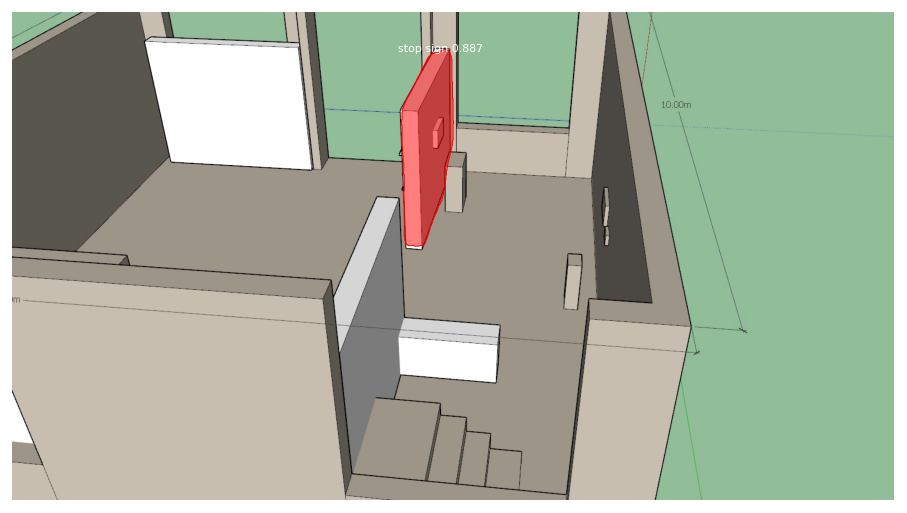

Processing 1 images
image                    shape: (885, 1615, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1615.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Counter()

*** No instances to display *** 



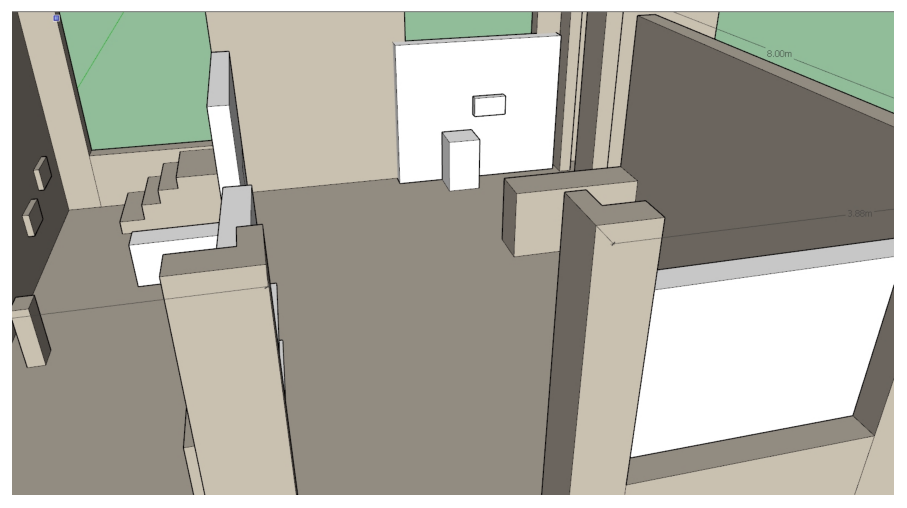

Processing 1 images
image                    shape: (857, 1272, 3)        min:    0.00000  max:  249.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1272.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Counter()

*** No instances to display *** 



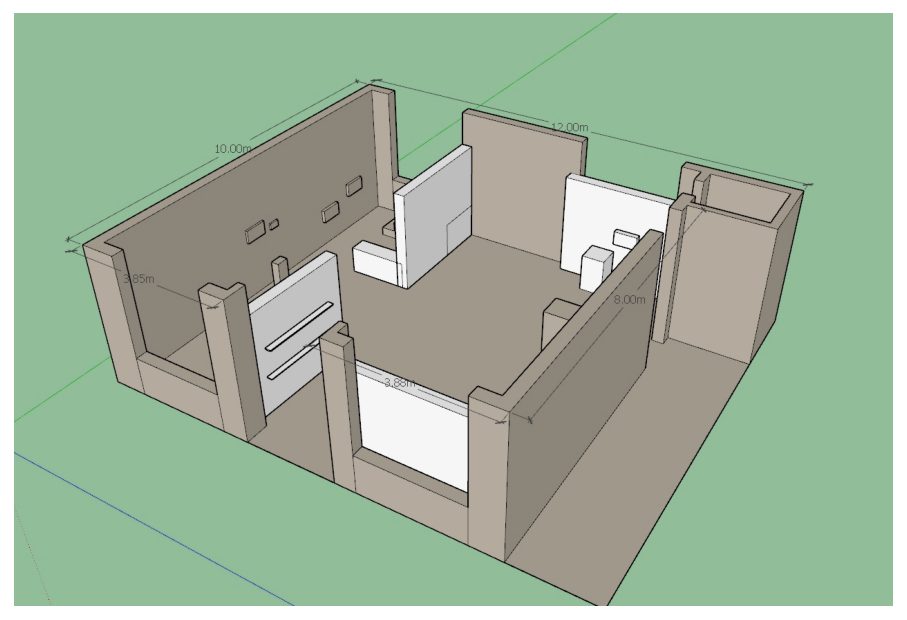

Processing 1 images
image                    shape: (880, 1609, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1609.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Counter()

*** No instances to display *** 



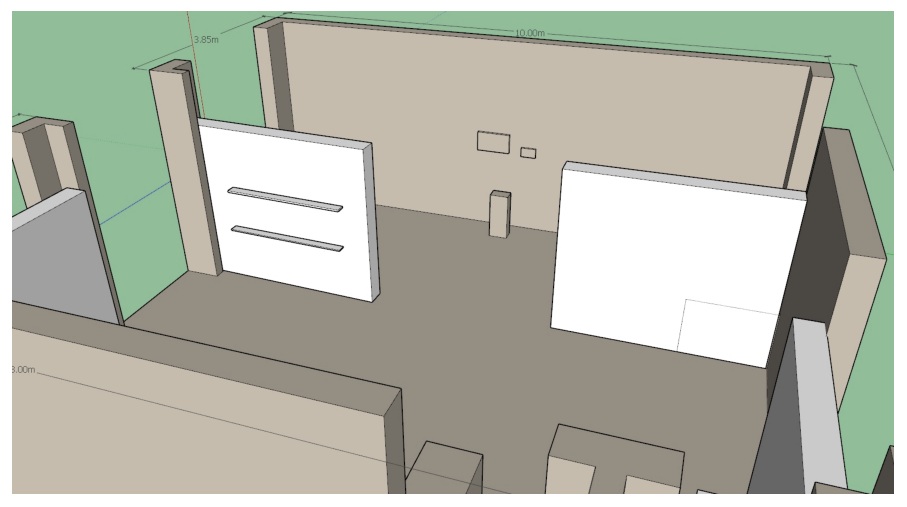

Processing 1 images
image                    shape: (886, 1610, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1610.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Counter({75: 1})
Object : clock, Quantity : 1


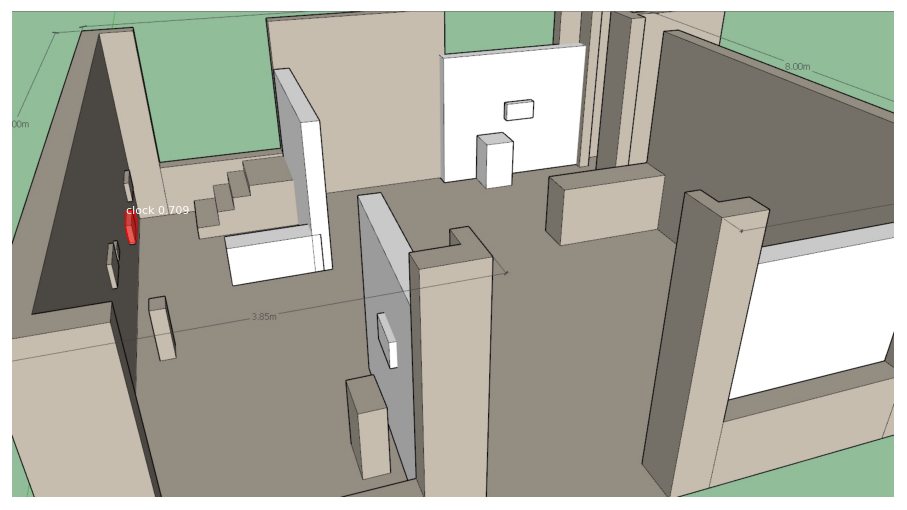

Processing 1 images
image                    shape: (885, 1625, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1625.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Counter()

*** No instances to display *** 



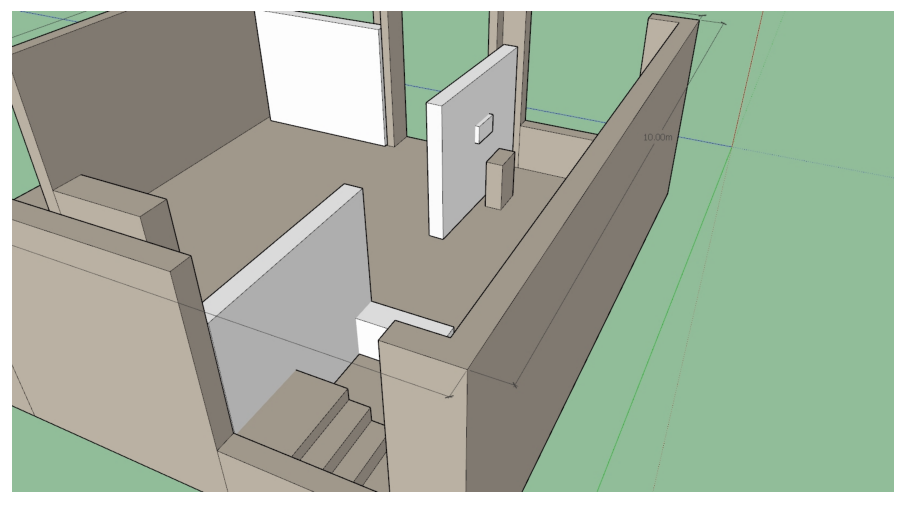

Processing 1 images
image                    shape: (829, 1006, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Counter()

*** No instances to display *** 



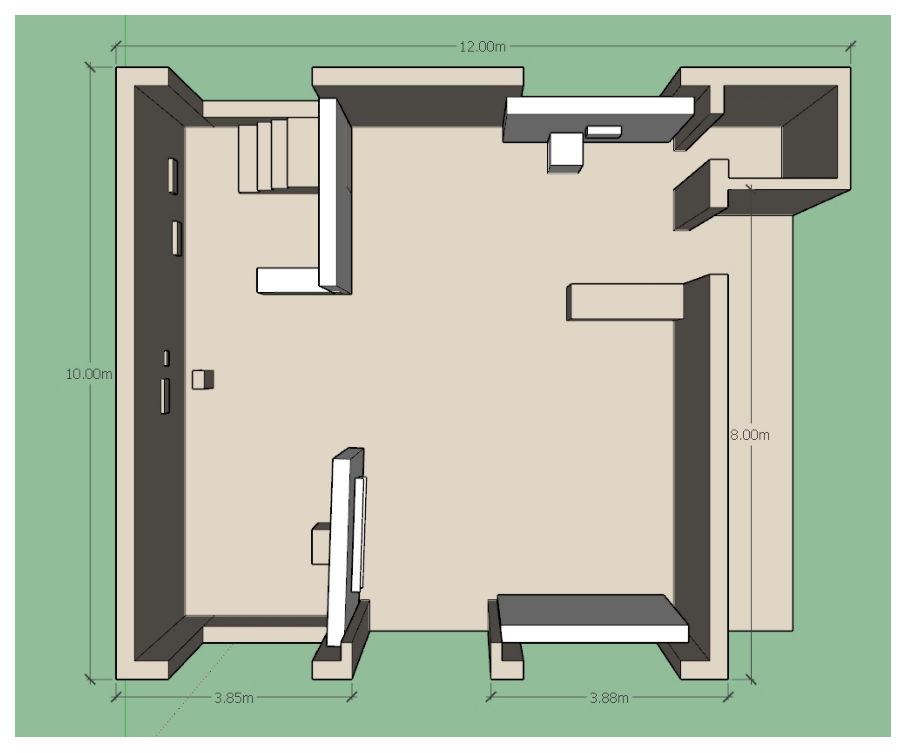

In [8]:
import cv2
import collections
images = load_images_from_folder('../content/Mask_RCNN/availabler/')
plt.figure(figsize=(16,9))
for image in images : 
  results=model.detect([image],verbose=1)
  r=results[0]
  class_ids=r['class_ids']
  counter=collections.Counter(class_ids)
  print(counter)
  for key in counter :
    print("Object : {}, Quantity : {}".format(class_names[key], counter[key]))
  visualize.display_instances(image,r['rois'],r['masks'],r['class_ids'], class_names, r['scores'],show_bbox=False)
  

In [9]:
import cv2
images = load_images_from_folder('../content/Mask_RCNN/availabler/')
plt.figure(figsize=(16,9))
for image in images : 
  results=model.detect([image],verbose=1)
  r=results[0]
  visualize.display_instances_2(image,r['rois'],r['masks'],r['class_ids'], class_names, r['scores'],show_bbox=False)

Processing 1 images
image                    shape: (880, 1591, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1591.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


AttributeError: ignored

<Figure size 1152x648 with 0 Axes>

Processing 1 images
image                    shape: (886, 1610, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1610.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


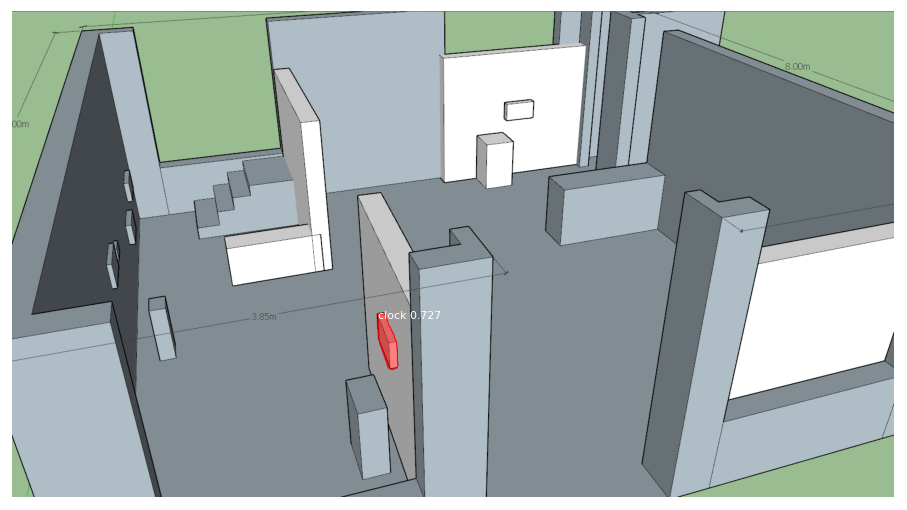

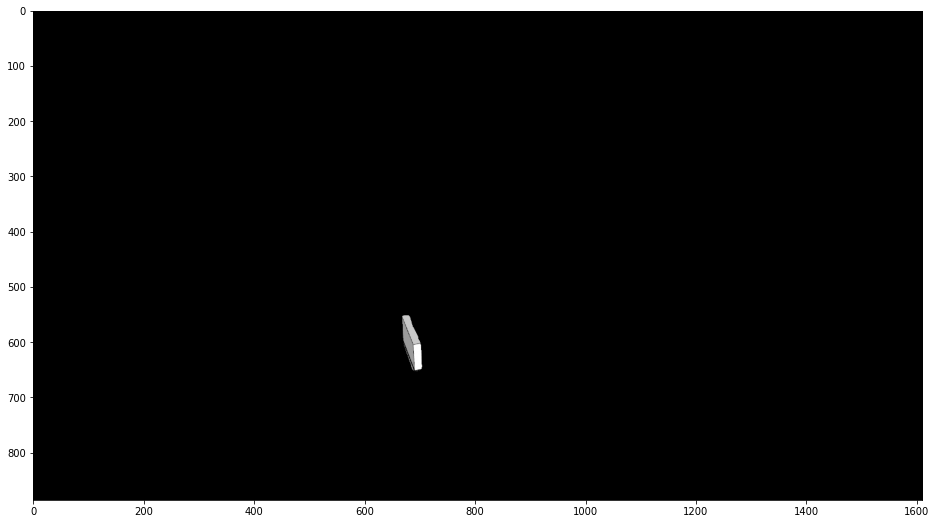

In [12]:
image=skimage.io.imread('../content/Mask_RCNN/availabler/10.jpg')
results=model.detect([image],verbose=1)
r=results[0]
visualize.display_instances(image,r['rois'],r['masks'],r['class_ids'], class_names, r['scores'],show_bbox=False)
mask = r['masks']
mask=mask.astype(int)
mask.shape
for i in range(mask.shape[2]):
    temp = skimage.io.imread('../content/Mask_RCNN/availabler/10.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(16,9))
    plt.imshow(temp)